In [31]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

In [2]:
dir_path = '/home/fakerpbc/data/datapar2/Wholesale customers data.csv'

In [3]:
df = pd.read_csv(dir_path, sep=',', header=0)
df.head(5)
dff = df

In [4]:
data = df.as_matrix()
print(data.shape)
normalized_data = preprocessing.normalize(data)
# print(type(normalized_data))

(440, 8)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [5]:
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data.shape)

(440, 8)


/home/fakerpbc/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/fakerpbc/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
labels = KMeans(n_clusters=3, random_state=0).fit_predict(normalized_data)

In [7]:
df['label'] = labels
# labels

In [8]:
pca = PCA(n_components=2) #2-dimensional PCA
transformed1 = pd.DataFrame(pca.fit_transform(normalized_data))
print(type(transformed1))

<class 'pandas.core.frame.DataFrame'>


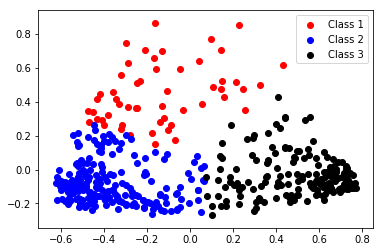

In [9]:
plt.scatter(transformed1[labels==0][0], transformed1[labels==0][1], label='Class 1', c='red')
plt.scatter(transformed1[labels==1][0], transformed1[labels==1][1], label='Class 2', c='blue')
plt.scatter(transformed1[labels==2][0], transformed1[labels==2][1], label='Class 3', c='black')

plt.legend()
plt.show()

In [10]:
labelss = KMeans(n_clusters=3, random_state=0).fit_predict(scaled_data)
dff['label'] = labelss
# labels
# print(dff)
pca = PCA(n_components=2) #2-dimensional PCA
transformed2 = pd.DataFrame(pca.fit_transform(scaled_data))

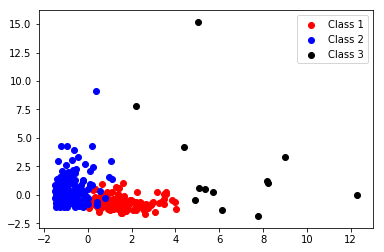

In [11]:
plt.scatter(transformed2[labelss==0][0], transformed2[labelss==0][1], label='Class 1', c='red')
plt.scatter(transformed2[labelss==1][0], transformed2[labelss==1][1], label='Class 2', c='blue')
plt.scatter(transformed2[labelss==2][0], transformed2[labelss==2][1], label='Class 3', c='black')

plt.legend()
plt.show()

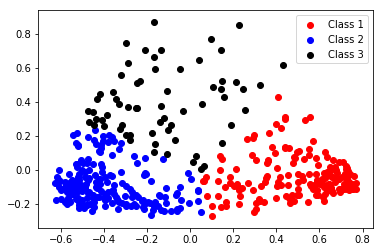

In [12]:
lab1 = KMeans(n_clusters=3, random_state=0).fit_predict(transformed1)
plt.scatter(transformed1[lab1==0][0], transformed1[lab1==0][1], label='Class 1', c='red')
plt.scatter(transformed1[lab1==1][0], transformed1[lab1==1][1], label='Class 2', c='blue')
plt.scatter(transformed1[lab1==2][0], transformed1[lab1==2][1], label='Class 3', c='black')
plt.legend()
plt.show()

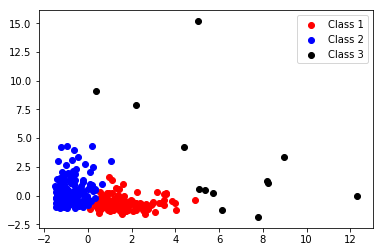

In [13]:
lab2 = KMeans(n_clusters=3, random_state=0).fit_predict(transformed2)
plt.scatter(transformed2[lab2==0][0], transformed2[lab2==0][1], label='Class 1', c='red')
plt.scatter(transformed2[lab2==1][0], transformed2[lab2==1][1], label='Class 2', c='blue')
plt.scatter(transformed2[lab2==2][0], transformed2[lab2==2][1], label='Class 3', c='black')

plt.legend()
plt.show()

In [14]:
#  score cho truong hop khong giam chieu du lieu va normalize_data
silhouette_00 =silhouette_score(normalized_data, labels)
print(silhouette_00)

0.447825754038059


In [15]:
#  score cho truong hop khong giam chieu du lieu va scaled_data
silhouette_01 =silhouette_score(scaled_data, labelss)
print(silhouette_01)

0.3567685389017652


In [16]:
#  score cho truong hop giam chieu du lieu = 2 va su dung normalize_data de giam
silhouette_1 =silhouette_score(transformed1, lab1)
print(silhouette_1)

0.5475972778567241


In [17]:
#  score cho truong hop giam chieu du lieu = 2 va su dung scaled_data de giam
silhouette_2 =silhouette_score(transformed2, lab2)
print(silhouette_2)

0.5537821054611746


/home/fakerpbc/.local/lib/python3.6/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


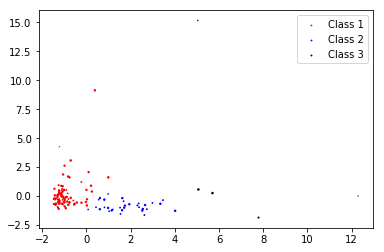

In [18]:
pca = PCA(n_components=3) #2-dimensional PCA
transformed3 = pd.DataFrame(pca.fit_transform(scaled_data))

lab3 = KMeans(n_clusters=3, random_state=0).fit_predict(transformed3)
plt.scatter(transformed3[lab3==0][0], transformed3[lab3==0][1], transformed3[lab3==0][2], label='Class 1', c='red')
plt.scatter(transformed3[lab3==1][0], transformed3[lab3==1][1], transformed3[lab3==1][2], label='Class 2', c='blue')
plt.scatter(transformed3[lab3==2][0], transformed3[lab3==2][1], transformed3[lab3==2][2], label='Class 3', c='black')
plt.legend()
plt.show()

In [19]:
#  score cho truong hop giam chieu du lieu = 3 va su dung scaled_data de giam
silhouette_3 =silhouette_score(transformed3, lab3)
print(silhouette_3)

0.42102584000436377


[-1  0]


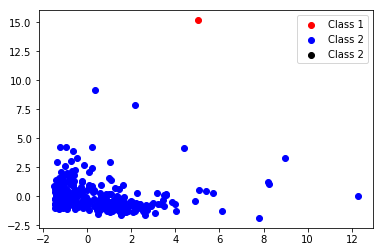

In [26]:
lab4 = DBSCAN(eps=5, min_samples=5, algorithm='auto', metric='euclidean').fit_predict(transformed2)
print(np.unique(lab4))
# print(lab4)
plt.scatter(transformed2[lab4==-1][0], transformed2[lab4==-1][1], label='Class 1', c='red')
plt.scatter(transformed2[lab4==0][0], transformed2[lab4==0][1], label='Class 2', c='blue')
plt.scatter(transformed2[lab4==1][0], transformed2[lab4==1][1], label='Class 2', c='black')
plt.legend()
plt.show()

In [21]:
silhouette_4 =silhouette_score(transformed2, lab4)
print(silhouette_4)

0.8551760383908256


In [22]:
lab5 = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', linkage='single', n_clusters=3).fit_predict(transformed2)
silhouette_5 =silhouette_score(transformed2, lab5)
print(silhouette_5)

0.8021516592128016


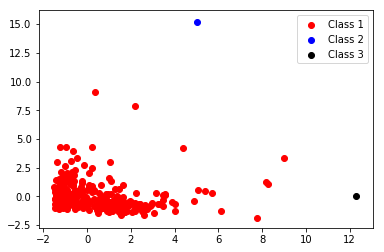

In [23]:
plt.scatter(transformed2[lab5==0][0], transformed2[lab5==0][1], label='Class 1', c='red')
plt.scatter(transformed2[lab5==1][0], transformed2[lab5==1][1], label='Class 2', c='blue')
plt.scatter(transformed2[lab5==2][0], transformed2[lab5==2][1], label='Class 3', c='black')

plt.legend()
plt.show()

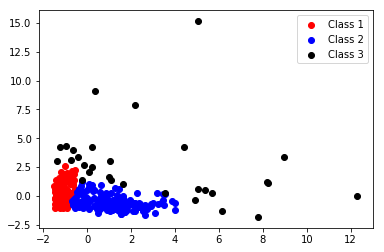

In [34]:
lab6 = GaussianMixture(n_components=3).fit_predict(transformed2)
plt.scatter(transformed2[lab6==0][0], transformed2[lab6==0][1], label='Class 1', c='red')
plt.scatter(transformed2[lab6==1][0], transformed2[lab6==1][1], label='Class 2', c='blue')
plt.scatter(transformed2[lab6==2][0], transformed2[lab6==2][1], label='Class 3', c='black')

plt.legend()
plt.show()

In [36]:
# silhouette score 
silhouette_6 =silhouette_score(transformed2, lab6)
print(silhouette_6)

0.46197738781637115
